#Simulación
##Unidad 3 Variables Aleatorias
###Facilitador: José Gabriel Rodríguez Rivas
###Alumna: Ximena Elizabeth Domínguez Morales

Practica 6: Simular las Llegadas de clientes y tiempos de servicio

###Problema:
En una tienda departamental de electrónicos, los gerentes desean simular el comportamiento de los clientes y el servicio para optimizar el personal y los tiempos de espera. Para esto, se pueden modelar dos situaciones claves:

Llegadas de clientes: Los clientes llegan a la tienda de manera aleatoria. Se sabe que en promedio llegan 10 clientes por hora.

Tiempo de servicio: Cada cliente que llega recibe atención personalizada para comprar productos electrónicos. El tiempo promedio de servicio es de 15 minutos por cliente.

El objetivo es combinar ambos modelos para obtener una simulación que muestre cómo interactúan las llegadas y los tiempos de servicio, lo que permitirá mejorar la gestión de personal en la tienda.


Llegadas simuladas por hora:
[9, 12, 4, 7, 7, 4, 9, 7, 12, 17, 12, 12, 7, 9, 10, 9, 11, 9, 7, 9, 11, 12, 9, 14, 9, 6, 8, 11, 14, 8, 4, 15, 12, 8, 8, 10, 14, 11, 8, 14, 8, 10, 7, 5, 9, 7, 10, 15, 7, 10, 9, 11, 12, 8, 13, 3, 9, 7, 11, 6, 7, 8, 12, 12, 9, 7, 10, 7, 12, 11, 10, 12, 12, 12, 10, 12, 16, 10, 7, 10, 12, 11, 11, 10, 5, 15, 16, 8, 6, 11, 7, 8, 13, 7, 8, 12, 7, 6, 11, 11, 5, 4, 11, 12, 12, 6, 8, 16, 12, 11, 13, 6, 11, 7, 12, 14, 13, 16, 7, 7, 14, 12, 11, 13, 13, 6, 12, 11, 10, 10, 10, 7, 10, 10, 6, 15, 15, 10, 4, 11, 12, 10, 14, 11, 6, 7, 10, 16, 4, 12, 9, 8, 19, 6, 14, 9, 10, 10, 14, 16, 15, 8, 17, 8, 7, 8, 7, 15, 11, 11, 12, 11, 15, 12, 4, 20, 6, 6, 9, 8, 12, 8, 12, 6, 11, 15, 13, 8, 11, 6, 10, 8, 8, 13, 7, 11, 9, 6, 4, 14, 8, 9, 8, 16, 12, 10, 17, 12, 5, 4, 11, 7, 10, 4, 7, 7, 8, 10, 15, 11, 14, 7, 11, 12, 7, 11, 13, 9, 16, 10, 11, 4, 9, 7, 8, 11, 8, 6, 13, 9, 10, 12, 16, 14, 8, 6, 10, 9, 19, 12, 14, 6, 5, 13, 11, 16, 11, 9, 13, 7, 9, 10, 10, 10, 9, 14, 17, 9, 6, 9, 9, 6, 11, 

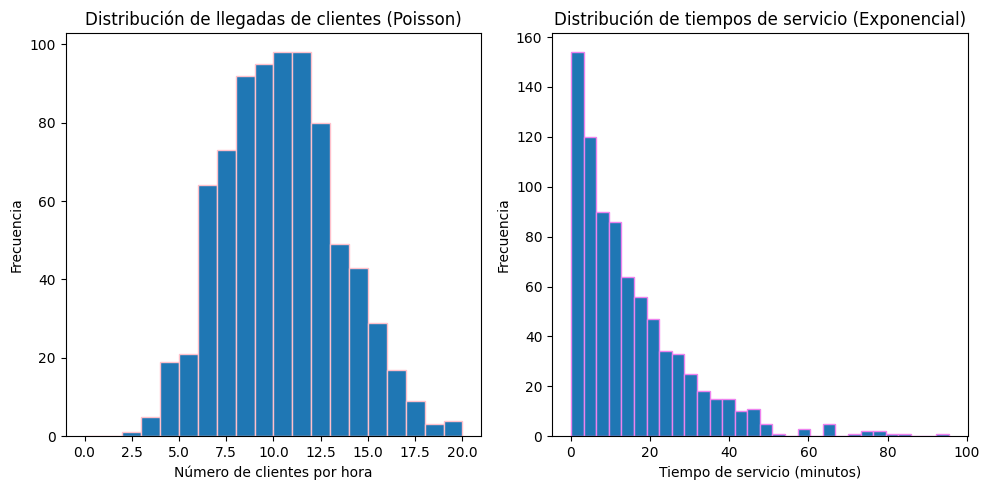

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math



lambda_llegadas = 10
tiempo_servicio_promedio = 15
lambda_servicio = 1 / tiempo_servicio_promedio
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1


def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio

num_horas = 8
num_simulaciones = 100
llegadas_simuladas = []
servicios_simulados = []


for _ in range(num_horas):
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)

# Mostrar resultados
print("Llegadas simuladas por hora:")
print(llegadas_simuladas)
print("Tiempos de servicio (en minutos) simulados:")
print(servicios_simulados)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(llegadas_simuladas, bins=range(0, max(llegadas_simuladas)+1), edgecolor='pink')
plt.title("Distribución de llegadas de clientes (Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")
plt.subplot(1, 2, 2)
plt.hist(servicios_simulados, bins=30, edgecolor='violet')
plt.title("Distribución de tiempos de servicio (Exponencial)")
plt.xlabel("Tiempo de servicio (minutos)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()